In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#
import networkx as nx
from os import listdir
import torch
import matplotlib.pyplot as plt
import scipy

In [2]:
import sys
from torch_geometric.utils import to_networkx
ROOT_FOLDER = "/home/yingjie/Year_3/"
# ROOT_FOLDER = "/home/yingjie_niu/Year_3/"
sys.path.append(ROOT_FOLDER+"GNN_longterm/code/graph_building/") 
from edge_generator import EdgeGenerator
from node_generator import NodeGenerator
from graph_generator import GraphGenerator
from firmgraph_dataset import FirmRelationGraph

/home/yingjie/miniconda3/envs/GNN/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = FirmRelationGraph(
    dynamic="cooccur",
    num_node_features=8,
    matrix_node_features=True,
    node_normalize='mean',
    num_Y_features=4,
    Y_type="mean",
    classification=True,
    graph_level_task=False,
    estimation_window=21,
    num_edge_features=1,
    weighted_edge=True,
    threshold=1,
    root = ROOT_FOLDER+"GNN_longterm/data/graph_sets",
    name="SPNews"
)

Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388
Generator for SPNews is initialized ...
Total Firms:  286 , Valid Firms:  268
388 trading days.  532 natual days.
Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388
Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388


Processing...
100%|██████████| 388/388 [01:45<00:00,  3.67it/s]
Done!


In [4]:
def visualize_graph(graph, N=30, top_N_nodes=None):
    sampled_nodes = [i for i in range(10,110)]
    G = graph
    G = to_networkx(G)

    # Step 1: Map the numerical nodes to text labels using index_to_ticker
    mapping = {node: dataset.graphgenerator.index_to_ticker(node) for node in G.nodes()}  # Rename nodes using index_to_ticker

    # Step 2: Relabel the nodes using the mapping
    G = nx.relabel_nodes(G, mapping)

    # Step 3: Calculate the degree of each node and sort them in descending order
    degree_dict = dict(G.degree())
    sorted_nodes_by_degree = sorted(degree_dict, key=degree_dict.get, reverse=True)

    # Step 4: Select the top N nodes
    if top_N_nodes is None:
        top_N_nodes = sorted_nodes_by_degree[:N]

    # Step 5: Create a subgraph with only the top N nodes
    H = G.subgraph(top_N_nodes)

    # Step 6: Draw the subgraph
    plt.figure(figsize=(10, 8))  # Set the figure size
    nx.draw_networkx(H, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    plt.title("Company Relation Graph")
    # Show the plot
    plt.show()

    print("Nodes: ", len(G.nodes))
    print('Edges: ', len(G.edges))
    print("top_N_nodes: ", top_N_nodes)
    return G, top_N_nodes

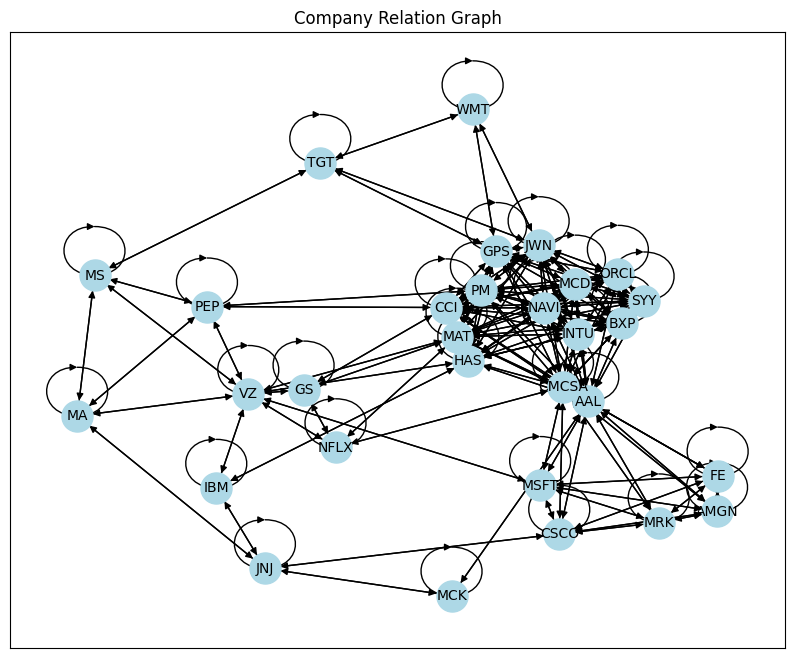

Nodes:  268
Edges:  1348
top_N_nodes:  ['CMCSA', 'AAL', 'VZ', 'ORCL', 'MSFT', 'TGT', 'GPS', 'CCI', 'MAT', 'JNJ', 'JWN', 'HAS', 'GS', 'MRK', 'MCD', 'PM', 'INTU', 'MA', 'BXP', 'IBM', 'NAVI', 'MS', 'SYY', 'FE', 'CSCO', 'NFLX', 'MCK', 'WMT', 'AMGN', 'PEP']


In [6]:
G, top_N_nodes = visualize_graph(dataset[0], N=30)

In [7]:
dataset = FirmRelationGraph(
    dynamic="corr_std5",
    num_node_features=8,
    matrix_node_features=True,
    node_normalize='mean',
    num_Y_features=4,
    Y_type="mean",
    classification=True,
    graph_level_task=False,
    estimation_window=21,
    num_edge_features=1,
    weighted_edge=True,
    threshold=0,
    root = ROOT_FOLDER+"GNN_longterm/data/graph_sets",
    name="SPNews"
)

Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388
Generator for SPNews is initialized ...
Total Firms:  286 , Valid Firms:  268
388 trading days.  532 natual days.
Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388
Incomplete price data record:  CA . Removed from valid_firm_list.
Valid Firms:  269
Incomplete price data record:  PXD 388


Processing...
100%|██████████| 388/388 [01:46<00:00,  3.66it/s]
Done!


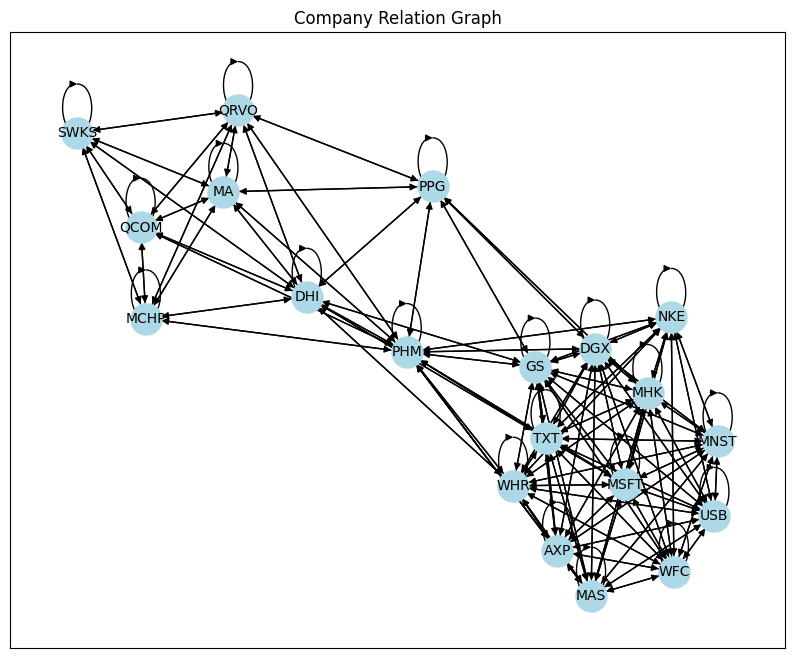

Nodes:  268
Edges:  1616
top_N_nodes:  ['PHM', 'TXT', 'MA', 'GS', 'DHI', 'MAS', 'QCOM', 'MNST', 'MSFT', 'AXP', 'USB', 'MHK', 'SWKS', 'NKE', 'DGX', 'WHR', 'PPG', 'WFC', 'QRVO', 'MCHP']


In [8]:
G, _ = visualize_graph(dataset[0], N=20)


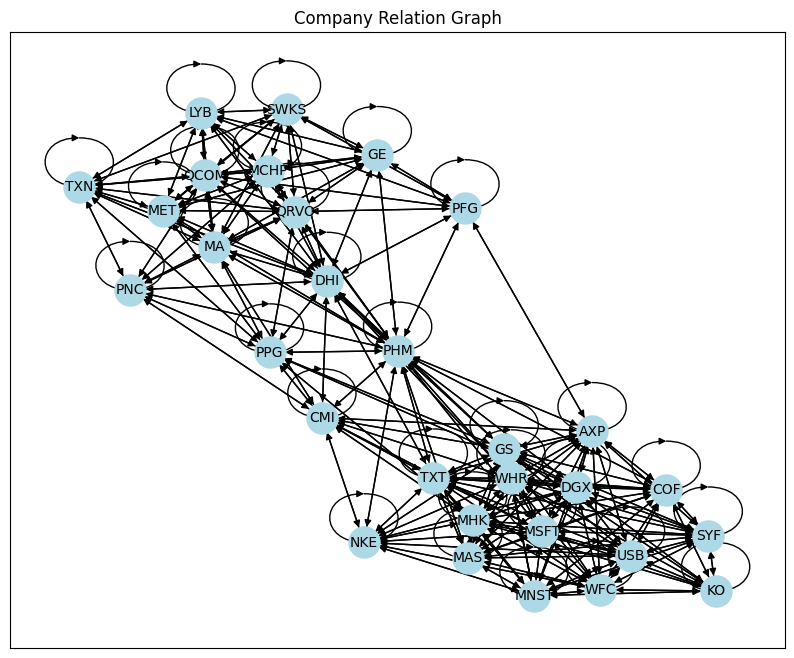

Nodes:  268
Edges:  1616
top_N_nodes:  ['PHM', 'TXT', 'MA', 'GS', 'DHI', 'MAS', 'QCOM', 'MNST', 'MSFT', 'AXP', 'USB', 'MHK', 'SWKS', 'NKE', 'DGX', 'WHR', 'PPG', 'WFC', 'QRVO', 'MCHP', 'COF', 'MET', 'CMI', 'SYF', 'GE', 'PFG', 'TXN', 'LYB', 'PNC', 'KO']


In [9]:
G, _ = visualize_graph(dataset[0], N=30)


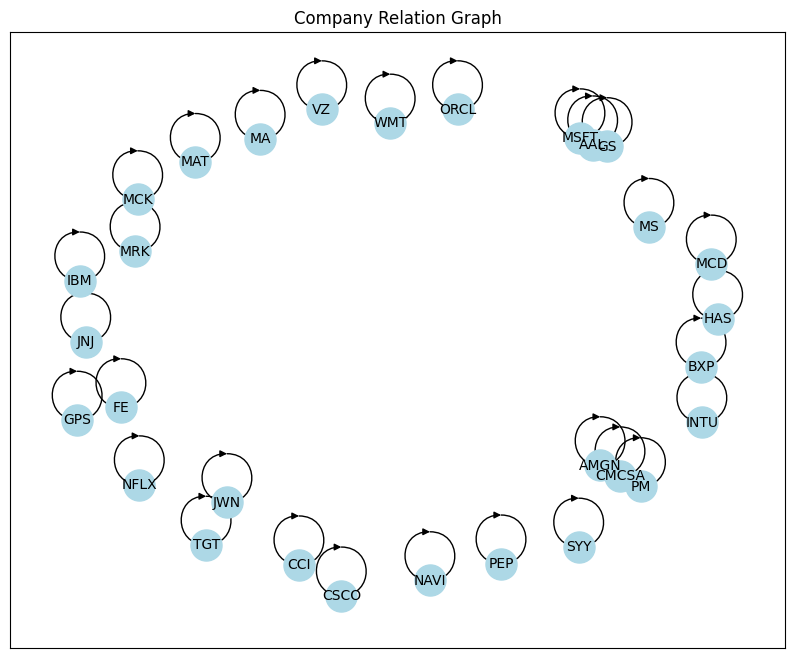

Nodes:  268
Edges:  1616
top_N_nodes:  ['CMCSA', 'AAL', 'VZ', 'ORCL', 'MSFT', 'TGT', 'GPS', 'CCI', 'MAT', 'JNJ', 'JWN', 'HAS', 'GS', 'MRK', 'MCD', 'PM', 'INTU', 'MA', 'BXP', 'IBM', 'NAVI', 'MS', 'SYY', 'FE', 'CSCO', 'NFLX', 'MCK', 'WMT', 'AMGN', 'PEP']


In [10]:
G, _ = visualize_graph(dataset[0], N=30, top_N_nodes=top_N_nodes)